In [25]:
from read_data import clean_data
import seaborn as sns

In [26]:
sns.set()

In [3]:
df = clean_data()

In [4]:
df.head()

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Date
0,Hubei,Mainland China,64287.0,2495.0,16748.0,2020-02-24
1,Guangdong,Mainland China,1345.0,6.0,786.0,2020-02-24
2,Henan,Mainland China,1271.0,19.0,943.0,2020-02-24
3,Zhejiang,Mainland China,1205.0,1.0,782.0,2020-02-24
4,Hunan,Mainland China,1016.0,4.0,731.0,2020-02-24


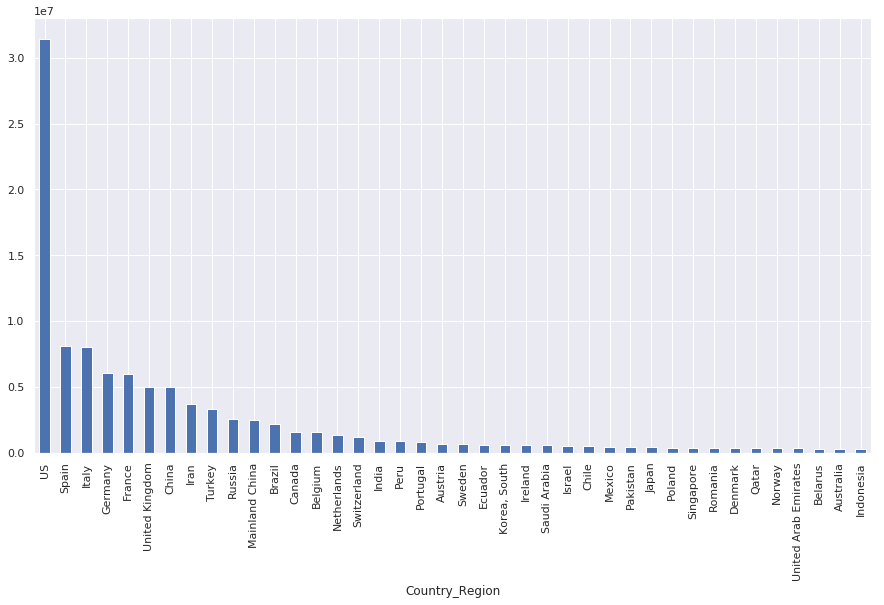

In [31]:
df.groupby('Country_Region').Confirmed.sum().sort_values(ascending=False)[0:40].plot(kind='bar',figsize=(15,8))

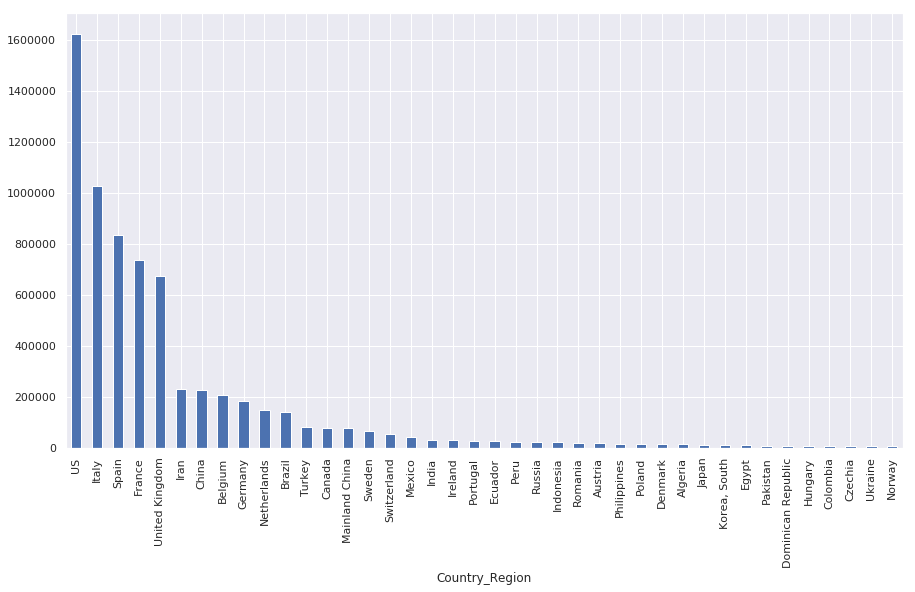

In [35]:
df.groupby('Country_Region').Deaths.sum().sort_values(ascending=False)[0:40].plot(kind='bar',figsize=(15,8))

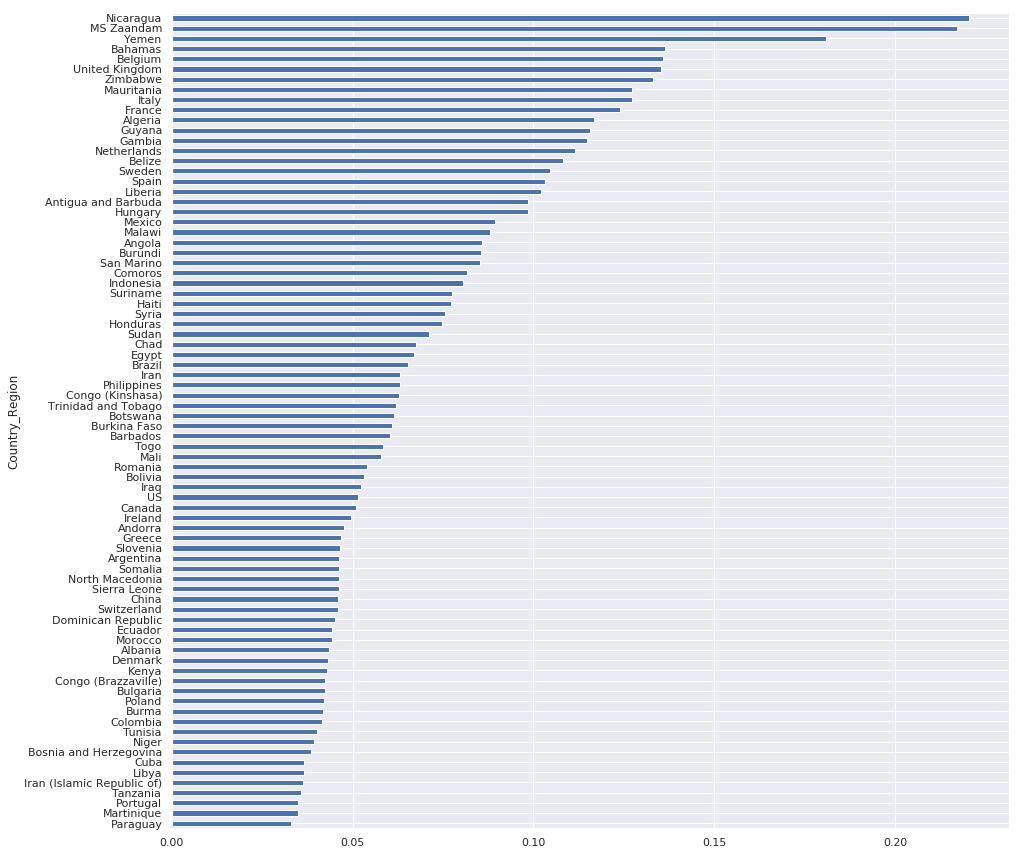

In [30]:
(df.groupby('Country_Region').Deaths.sum()/df.groupby('Country_Region').Confirmed.sum()).sort_values(ascending=False)[0:80].sort_values().plot(kind='barh',figsize=(15,15))